<a href="https://colab.research.google.com/github/Rhitabrat/MAMI/blob/main/Text%20plus%20Visual%20Embeddings/image_text_from_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate baseline for image plus text data

In [1]:
!pip install -q tf-models-official

     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 213 kB 66.2 MB/s 
     |████████████████████████████████| 47.7 MB 125 kB/s 
     |████████████████████████████████| 596 kB 74.0 MB/s 
     |████████████████████████████████| 1.2 MB 65.3 MB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 90 kB 7.8 MB/s 
     |████████████████████████████████| 4.9 MB 68.6 MB/s 
     |████████████████████████████████| 352 kB 80.7 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 63.1 MB/s 


In [2]:
!pip install -q -U tensorflow-text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
'''
requires the same folder:
- script evaluation
-folder 'ref' with truth.txt
-folder 'TRAINING' with images
'''

# import evaluation
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import regularizers
import os
import gc
import shutil
import json

In [5]:
tf.compat.v1.disable_eager_execution()

In [6]:
# paths
csv_path_test = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TEST/CSV/Test.csv'
csv_path_train = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TRAIN/CSVs/training_original.csv'
image_path = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TRAIN/Images'


def loadImage(image_path):
    try:
        return load_img(image_path, target_size=(image_size, image_size))
    except:
        image_path = image_path.replace('png', 'jpg')
        return load_img(image_path, target_size=(image_size, image_size))

# if not os.path.exists('./ImageTextModel'):
    # os.makedirs('./ImageTextModel')

if not os.path.exists('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel'):
    os.makedirs('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel')
    
batch_size = 32
epochs = 30
image_size = 299
embed_size = 768 #according to USE
threshold = 0.5

# #Universal Sentence Encoder
# tf.compat.v1.disable_eager_execution()

# module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed"
# embed = hub.Module(module_url)

#Test

In [126]:
import tensorflow_text as text
from official.nlp import optimization

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [8]:
bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [14]:
# #_______________________________Load Train Data_______________________________


# train_df = pd.read_csv(csv_path_train, usecols=['file_name', 'misogynous', 'Text Transcription'], sep='\t')
# path = image_path+'/'

# train_df['image_path'] = path + train_df['file_name']

# # Universal Sentence Encoder (USE)
# '''
# Split the dataset to avoid hitting the USE call limit
# an error occurs if the 47900 steps are reached
# '''
# dfs = np.array_split(train_df, 10)
# train_df['USE'] = None
# text_embeddings=[]
# with tf.compat.v1.Session() as session:
#     session.run([tf.compat.v1.global_variables_initializer(), tf.compat.v1.tables_initializer()])
   
#     for x in dfs:
#       x_data_matches = pd.Series([])
#     #   text_embedding = session.run(embed(list(x['Text Transcription'])))
#       preprocess = bert_preprocess_model(list(x['Text Transcription']))
#       text_embedding = session.run(bert_model(preprocess)['pooled_output'])
      
#       text_embeddings = text_embeddings + np.array(text_embedding).tolist()
      
# train_df['USE'] = text_embeddings


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [19]:
# train_df.to_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/trained_bert_2.csv", index=False)

# Load Train

In [7]:
#_______________________________Load Train Data_______________________________
train_df = pd.read_csv(csv_path_train, usecols=['file_name', 'misogynous', 'Text Transcription'], sep='\t')
path = image_path+'/'

train_df['image_path'] = path + train_df['file_name']

In [8]:
# load saved embedddings
train_df_emb = pd.read_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/trained_bert_2.csv")

def str_list(text):
    return json.loads(text)

train_df['USE'] = train_df_emb.USE.apply(str_list)

In [9]:
# img_array = pd.read_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/image_array.csv")

In [9]:
#_______________________________Load Train Data_______________________________
# train_df = pd.read_csv(csv_path_train, usecols=['file_name', 'misogynous', 'Text Transcription'], sep='\t')
# path = image_path+'/'

# train_df['image_path'] = path + train_df['file_name']

# # Universal Sentence Encoder (USE)
# '''
# Split the dataset to avoid hitting the USE call limit
# an error occurs if the 47900 steps are reached
# '''
# dfs = np.array_split(train_df, 10)
# train_df['USE'] = None
# text_embeddings=[]
# with tf.compat.v1.Session() as session:
#     session.run([tf.compat.v1.global_variables_initializer(), tf.compat.v1.tables_initializer()])
   
#     for x in dfs:
#       x_data_matches = pd.Series([])
#       text_embedding = session.run(embed(list(x['Text Transcription'])))
#       text_embeddings = text_embeddings + np.array(text_embedding).tolist()
      
# train_df['USE'] = text_embeddings

#load images
train_df['image'] = None
train_df['image'] = train_df['image_path'].apply(lambda x: img_to_array(loadImage(x)))
# train_df['image'] = img_array

#division and processing of data as input to the model
X_train = train_df[['file_name', 'USE', 'image']]
y_train = train_df['misogynous']


#text
tmp = []
for value in X_train['USE']:
    tmp.append([value])  
tX_train = np.array(tmp)

#images
tmp = []
for value in X_train['image']:
  tmp.append(value) 
iX_train = np.array(tmp)

#misogynous label
tmp = []
for value in y_train:
    tmp.append([value])  
y_train = np.array(tmp)

#clear memory
# del train_df
# del dfs
# del text_embedding
# del text_embeddings

gc.collect()

0

In [95]:
# train_df.image.to_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/image_array.csv", index=False)

In [71]:
# #text
# tmp = []
# for value in train_df.USE:
#     tmp.append([value])  
# tX_train = np.array(tmp)

In [74]:
# tX_train.shape

In [102]:
# y_train = train_df_1.misogynous

# Image VGG

In [11]:
#_______________________________IMAGE MODEL_______________________________
l2_strength = 1e-5

input_image = layers.Input(shape=(image_size,image_size,3))
vgg_model = VGG16(input_tensor = input_image, weights = 'imagenet', include_top=False)

for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = layers.Flatten(input_shape=vgg_model.output_shape[1:])(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_strength))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_strength))(x)
x = layers.Dense(1, activation='sigmoid')(x)
image_model = Model(vgg_model.input, x)

image_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
image_model.summary()

history = image_model.fit(iX_train, 
                    y_train,
                    validation_split=0.2,
                    epochs= 30,
                    batch_size=batch_size,
                    #verbose=0,
                    )
                    
# image_model.save('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/image_model.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


8000/8000 [==============================] - 33s 4ms/sample - loss: 2.8499 - accuracy: 0.5820 - val_loss: 0.7174 - val_accuracy: 0.6170
Epoch 2/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.9609 - accuracy: 0.6184 - val_loss: 0.6354 - val_accuracy: 0.6225
Epoch 3/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.6928 - accuracy: 0.6566 - val_loss: 0.6005 - val_accuracy: 0.6895
Epoch 4/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.6602 - accuracy: 0.6801 - val_loss: 0.6007 - val_accuracy: 0.6705
Epoch 5/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.6230 - accuracy: 0.7113 - val_loss: 0.6021 - val_accuracy: 0.6870
Epoch 6/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.5731 - accuracy: 0.7321 - val_loss: 0.6242 - val_accuracy: 0.6595
Epoch 7/50
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.5134 - accuracy: 0.7611 - val_loss: 0.6421 - val

# Image Xception

In [10]:
#_______________________________IMAGE MODEL_______________________________
l2_strength = 1e-5

input_image = layers.Input(shape=(image_size,image_size,3))
vgg_model = tf.keras.applications.Xception(input_tensor = input_image, weights = 'imagenet', include_top=False)

for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = layers.Flatten(input_shape=vgg_model.output_shape[1:])(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_strength))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_strength))(x)
x = layers.Dense(1, activation='sigmoid')(x)
image_model = Model(vgg_model.input, x)

image_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
image_model.summary()

history = image_model.fit(iX_train, 
                    y_train,
                    validation_split=0.2,
                    epochs= 30,
                    batch_size=batch_size,
                    #verbose=0,
                    )
                    
# image_model.save('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/image_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  12

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


8000/8000 [==============================] - 524s 65ms/sample - loss: 2.0600 - accuracy: 0.5825 - val_loss: 5.6787 - val_accuracy: 0.4895
Epoch 2/30
8000/8000 [==============================] - 392s 49ms/sample - loss: 0.6737 - accuracy: 0.6441 - val_loss: 5.3032 - val_accuracy: 0.5175
Epoch 3/30
8000/8000 [==============================] - 414s 52ms/sample - loss: 0.6591 - accuracy: 0.6522 - val_loss: 6.0636 - val_accuracy: 0.5205
Epoch 4/30
8000/8000 [==============================] - 424s 53ms/sample - loss: 0.6317 - accuracy: 0.6752 - val_loss: 8.8465 - val_accuracy: 0.4935
Epoch 5/30
8000/8000 [==============================] - 406s 51ms/sample - loss: 0.6377 - accuracy: 0.6706 - val_loss: 11.1394 - val_accuracy: 0.4945
Epoch 6/30
8000/8000 [==============================] - 437s 55ms/sample - loss: 0.6272 - accuracy: 0.6852 - val_loss: 7.5475 - val_accuracy: 0.4875
Epoch 7/30
8000/8000 [==============================] - 438s 55ms/sample - loss: 0.6262 - accuracy: 0.6846 - val_los

# Text

In [11]:
#_______________________________TEXT MODEL_______________________________
input_text = layers.Input(shape=(1, embed_size))

l = tf.keras.layers.Dropout(0.1, name="dropout")(input_text)
l = tf.keras.layers.Dense(1, activation='sigmoid')(l)

text_model = Model(inputs=[input_text], outputs=l)
text_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
text_model.summary()

history = text_model.fit(tX_train,
                    y_train,
                    validation_split=0.2,
                    epochs= 30,
                    batch_size=batch_size,
                    #verbose=0
                    )

# text_model.save('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/text_model.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 768)]          0         
                                                                 
 dropout (Dropout)           (None, 1, 768)            0         
                                                                 
 dense_3 (Dense)             (None, 1, 1)              769       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
7648/8000 [===========================>..] - ETA: 0s - loss: 0.7094 - accuracy: 0.4986

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


8000/8000 [==============================] - 1s 156us/sample - loss: 0.7092 - accuracy: 0.4986 - val_loss: 0.6939 - val_accuracy: 0.4991
Epoch 2/30
8000/8000 [==============================] - 1s 74us/sample - loss: 0.7072 - accuracy: 0.5004 - val_loss: 0.6975 - val_accuracy: 0.4832
Epoch 3/30
8000/8000 [==============================] - 1s 78us/sample - loss: 0.7077 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.5168
Epoch 4/30
8000/8000 [==============================] - 1s 75us/sample - loss: 0.7085 - accuracy: 0.5069 - val_loss: 0.7073 - val_accuracy: 0.4808
Epoch 5/30
8000/8000 [==============================] - 1s 71us/sample - loss: 0.7051 - accuracy: 0.5032 - val_loss: 0.6957 - val_accuracy: 0.4888
Epoch 6/30
8000/8000 [==============================] - 1s 70us/sample - loss: 0.7042 - accuracy: 0.5014 - val_loss: 0.6936 - val_accuracy: 0.5182
Epoch 7/30
8000/8000 [==============================] - 1s 72us/sample - loss: 0.7051 - accuracy: 0.5020 - val_loss: 0.7082 - va

In [87]:
# image = image_model.layers[len(image_model.layers)-2].output
# reshape = layers.Reshape((1, image_model.layers[len(image_model.layers)-2].output_shape[1]), name='predictions')(image)
# text = text_model.layers[0].output

# input = tf.keras.layers.Concatenate(axis=-1)([text, reshape])

# l = layers.Dense(1, activation='sigmoid')(input)
# model = Model(inputs=[input_text, input_image], outputs=[l])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [ ]:
# input_image = layers.Input(shape=(image_size,image_size,3))
# vgg_model = VGG16(input_tensor = input_image, weights = 'imagenet', include_top=False)

In [21]:
# txt_model = tf.keras.models.load_model('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/text_model.h5')
# # txt_model.summary()
# txt_model.layers[0].output

In [86]:
# load image_model from dir
# image_model = tf.keras.models.load_model('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/image_model.h5')
# image_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


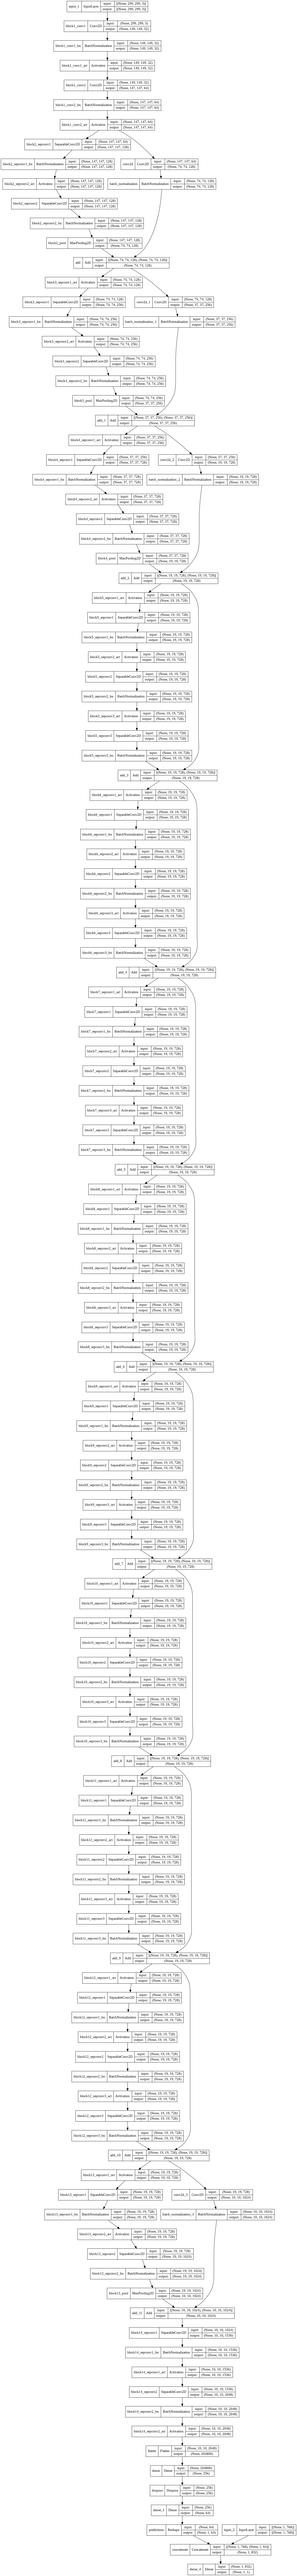

In [12]:
#_______________________________IMAGE-TEXT MODEL_______________________________
image = image_model.layers[len(image_model.layers)-2].output
reshape = layers.Reshape((1, image_model.layers[len(image_model.layers)-2].output_shape[1]), name='predictions')(image)
text = text_model.layers[0].output

input = tf.keras.layers.Concatenate(axis=-1)([text, reshape])

l = layers.Dense(1, activation='sigmoid')(input)
model = Model(inputs=[input_text, input_image], outputs=[l])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.save('/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/image_text_model.h5')
tf.keras.utils.plot_model(model, "/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/model.png", show_shapes=True)

In [13]:
# paths
csv_path_test = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TEST/CSV/Test.csv'
image_path = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TEST/Images'

#load data
test_df = pd.read_csv(csv_path_test, sep='\t')
path = image_path+'/'
test_df['image_path'] = path + test_df['file_name']

In [14]:
test_df_emd = pd.read_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/trained_bert_test_1.csv")

def str_list(text):
    return json.loads(text)

test_df['USE'] = test_df_emd.USE.apply(str_list)

In [15]:
#_______________________________Load Test Data_______________________________
#clear memory
# del X_train
# del y_train
# del iX_train
# del tX_train

# gc.collect()

# # paths
# csv_path_test = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TEST/CSV/Test.csv'
# image_path = '/content/drive/MyDrive/PSU/NLP Lab/MAMI/TEST/Images'

# #load data
# test_df = pd.read_csv(csv_path_test, sep='\t')
# path = image_path+'/'
# test_df['image_path'] = path + test_df['file_name']

# Universal Sentence Encoder (USE)
'''
Split the dataset to avoid hitting the USE call limit
an error occurs if the 47900 steps are reached
'''
# dfs = np.array_split(test_df, 10)
# test_df['USE'] = None
# text_embeddings=[]
# with tf.compat.v1.Session() as session:
#     session.run([tf.compat.v1.global_variables_initializer(), tf.compat.v1.tables_initializer()])
   
#     for x in dfs:
#       x_data_matches = pd.Series([])
#     #   text_embedding = session.run(embed(list(x['Text Transcription'])))
#       preprocess = bert_preprocess_model(list(x['Text Transcription']))
#       text_embedding = session.run(bert_model(preprocess)['pooled_output'])
      
#       text_embeddings = text_embeddings + np.array(text_embedding).tolist()
      
# test_df['USE'] = text_embeddings

# dfs = np.array_split(test_df, 10)
# test_df['USE'] = None
# text_embeddings=[]
# with tf.compat.v1.Session() as session:
#     session.run([tf.compat.v1.global_variables_initializer(), tf.compat.v1.tables_initializer()])
   
#     for x in dfs:
#       x_data_matches = pd.Series([])
#       text_embedding = session.run(embed(list(x['Text Transcription'])))
#       text_embeddings = text_embeddings + np.array(text_embedding).tolist()
# test_df['USE'] = text_embeddings

#Load images
test_df['image'] = None
test_df['image'] = test_df['image_path'].apply(lambda x: img_to_array(loadImage(x)))        

#division and processing of data as input to the model
X_test = test_df[['file_name', 'USE', 'image']]

#Text
tmp = []
for value in X_test['USE']:
    tmp.append([value])  
tX_test = np.array(tmp)


#images
tmp = []
for value in X_test['image']:
    tmp.append(value)  
iX_test = np.array(tmp)

#clear memory
del tmp
# del dfs
# del text_embedding
# del text_embeddings

gc.collect()



40791

In [38]:
# test_df.to_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Items/trained_bert_test_1.csv", index=False)

In [16]:
#_______________________________PREDICTION_______________________________
predictions = model.predict([tX_test, iX_test], batch_size=batch_size)
predictions = predictions.reshape(predictions.shape[0])
pred = predictions > threshold
pred = list(map(int, pred)) #true/false to 1/0

predictions_db = pd.DataFrame(data=test_df['file_name'])
predictions_db['misogynist'] = pred


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [17]:
predictions_db.to_csv("/content/drive/MyDrive/PSU/NLP Lab/MAMI/answer_1.txt", index=False, sep='\t', header=False)
predictions_db

,file_name,misogynist
0,15236.jpg,0
1,15805.jpg,0
2,16254.jpg,1
3,16191.jpg,1
4,15952.jpg,1
...,...,...
995,15591.jpg,0
996,15049.jpg,1
997,15363.jpg,1
998,15199.jpg,1


In [ ]:
import evaluation

#_______________________________EVALUATION_______________________________
if not os.path.exists('./res'):
    os.makedirs('./res')

predictions_db.to_csv('./res/answer.txt', index=False, sep='\t', header=False)
evaluation.main(['','./', '/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/'])
#move res folder to ImageTextModel folder
shutil.move('./res/', '/content/drive/MyDrive/PSU/NLP Lab/MAMI/Saved Models/ImageTextModel/res/')


In [ ]:
# from sklearn.metrics import f1_score

# f1_score(test_df['misogynous'], predictions_db['misogynist'], average='micro')